In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import pandas as pd
from tqdm import tqdm
import os
from sklearn.metrics import confusion_matrix

In [3]:
df0 = pd.read_csv('../Recurrent-Autoencoder-modify/rec_error/lstmad_saved_rec_error_fold0_2022-02-24-14-10-42.csv')
df1 = pd.read_csv('../Recurrent-Autoencoder-modify/rec_error/lstmad_saved_rec_error_fold1_2022-02-24-13-54-01.csv')
df2 = pd.read_csv('../Recurrent-Autoencoder-modify/rec_error/lstmad_saved_rec_error_fold2_2022-02-24-13-56-50.csv')
df3 = pd.read_csv('../Recurrent-Autoencoder-modify/rec_error/lstmad_saved_rec_error_fold3_2022-02-24-13-47-09.csv')
df4 = pd.read_csv('../Recurrent-Autoencoder-modify/rec_error/lstmad_saved_rec_error_fold4_2022-02-24-13-40-10.csv')

In [4]:
fold_num = 4

In [5]:
df = eval('df'+str(fold_num))
data = np.array(df)[:, 1:]
print(data.shape)
data = np.vstack((data[:,1], data[:,0], data[:,2])).T
print(data[:5,])

(688555, 3)
[[ 0.          2.          9.3149662 ]
 [ 0.          2.         14.96766472]
 [ 0.          2.         11.21743393]
 [ 0.          2.         16.36530113]
 [ 0.          2.         16.98572922]]


In [6]:
# replace the following two car number lists
ind_ood_car_dict = np.load('../five_fold_utils/ind_odd_dict1.npz.npy', allow_pickle=True).item()
ind_car_num_list = ind_ood_car_dict['ind_sorted']
ood_car_num_list = ind_ood_car_dict['ood_sorted'] 

validation_car_number = ind_car_num_list[:int(fold_num * len(ind_car_num_list) / 5)] + ind_car_num_list[int((fold_num + 1) * len(ind_car_num_list) / 5):] + ood_car_num_list[int(fold_num * len(ood_car_num_list) / 5):int((fold_num + 1) * len(ood_car_num_list) / 5)]
test_car_number = ind_car_num_list[int(fold_num * len(ind_car_num_list) / 5):int((fold_num + 1) * len(ind_car_num_list) / 5)] + ood_car_num_list[:int(fold_num * len(ood_car_num_list) / 5)] + ood_car_num_list[int((fold_num + 1) * len(ood_car_num_list) / 5):]
# test_car_number = ind_car_num_list[int(fold_num * len(ind_car_num_list) / 5):int((fold_num + 1) * len(ind_car_num_list) / 5)] + ood_car_num_list

In [7]:
validation_data = []
test_data = []

for each_line in data:
    if each_line[1] in validation_car_number:
        validation_data.append(each_line)
    else:
        test_data.append(each_line)

validation_data = np.array(validation_data)
test_data = np.array(test_data)
print(validation_data.shape, test_data.shape)
all_data = np.vstack((validation_data, test_data))

(456207, 3) (232348, 3)


In [8]:
ind_car_score = []
ood_car_score = []

for each_car_num in test_car_number:
    this_car_score = np.mean(all_data[np.where(all_data[:, 1]==each_car_num)][:, 2])
    if each_car_num in ind_car_num_list:
        ind_car_score.append(this_car_score)
    else:
        ood_car_score.append(this_car_score)
#     print(each_car_num, len(this_car_score))

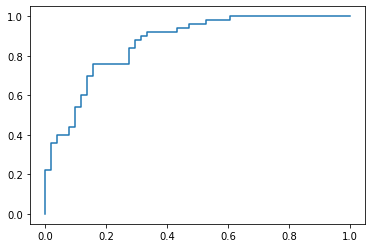

0.8650980392156863


In [9]:
label = [1] * len(ood_car_score) + [0] * len(ind_car_score)
score = np.hstack((ood_car_score, ind_car_score))

fpr, tpr, thresholds = metrics.roc_curve(label, score, pos_label=1)
plt.plot(fpr, tpr)
plt.show()
AUC = auc(fpr, tpr)
print(AUC)

np.save('../Recurrent-Autoencoder-modify/rec_error/average_score_fold%d' % fold_num, score)
np.save('../Recurrent-Autoencoder-modify/rec_error/average_label_fold%d' % fold_num, label)